**Задача:**


Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.


Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.


Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.


Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
    
    
 - Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
 - Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
 - Проанализировать основные признаки, наиболее сильно влияющие на отток;
 - Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
 
1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами

**Шаг 1. Загрузите данные**


«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.

**Шаг 2. Проведите исследовательский анализ данных (EDA)**
 - Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
 - Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
 - Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
 - Постройте матрицу корреляций и отобразите её.

**Шаг 3. Постройте модель прогнозирования оттока клиентов**
 - Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
 - Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
 - Обучите модель на train-выборке двумя способами: логистической регрессией и случайным лесом.
 - Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
 - Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

**Шаг 4. Сделайте кластеризацию клиентов**


Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
 - Стандартизируйте данные.
 - Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
 - Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
 - Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
 - Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
 - Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

**Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами**
 - Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.
 - Не описывайте стратегию детально: достаточно 3-4 важных принципов и примеров их реализации в виде определённых маркетинговых действий.

**Шаг 1. Загрузите данные**

In [1]:
## Загрузка библиотек**
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
# Сделаем обзор датасета
display(df.info())
display(df.describe())
display(df.head(10))
display(print('Количество дубликатов:', df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Количество дубликатов: 0


None

In [4]:
#Скинем названия столбцов в нижний регистр
df.columns = [x.lower() for x in df.columns]
df.columns.tolist() # проверим

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

**Вывод по шаг 1:**
    
На этом предобработку можно завершить, пропусков нет, дубликатов нет. Конечно можно было скинуть целые числа в int8, но размер датасета не велик.

**Шаг 2. Проведите исследовательский анализ данных (EDA)**

**2.1 Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())**

In [5]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Вывод по 2.1**: Пропусков и категориальных переменных нет

**2.2 Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())**

In [6]:
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**2.3 Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

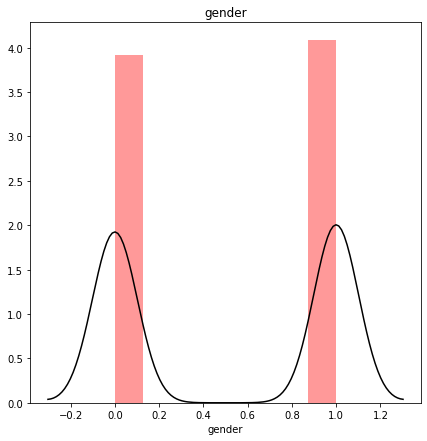

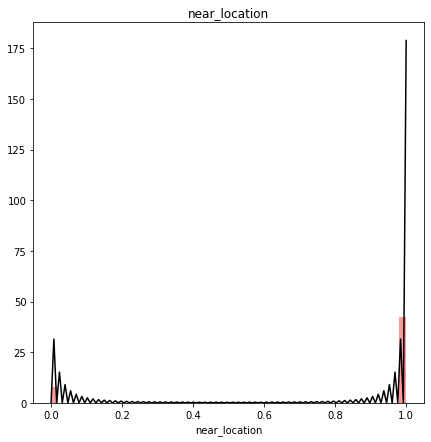

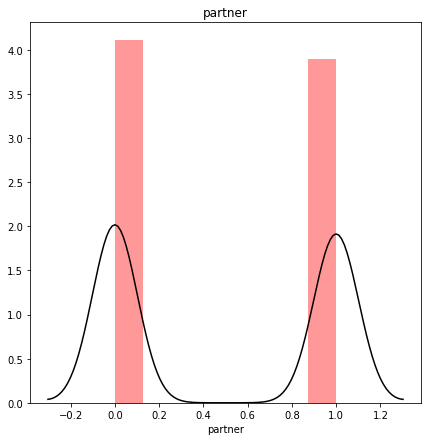

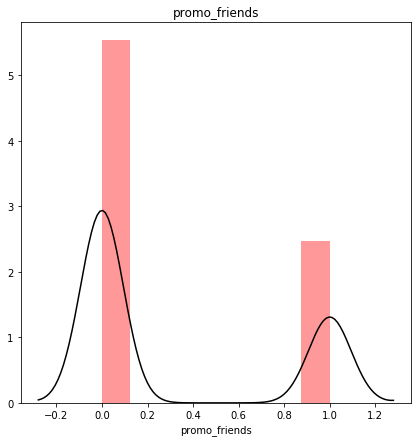

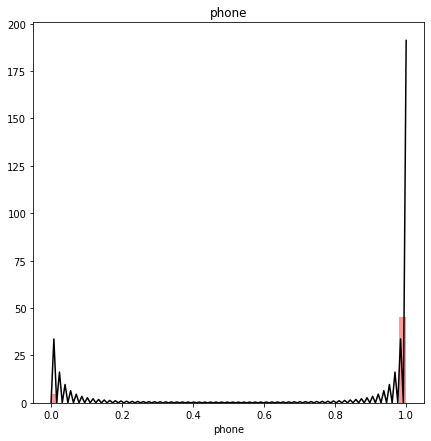

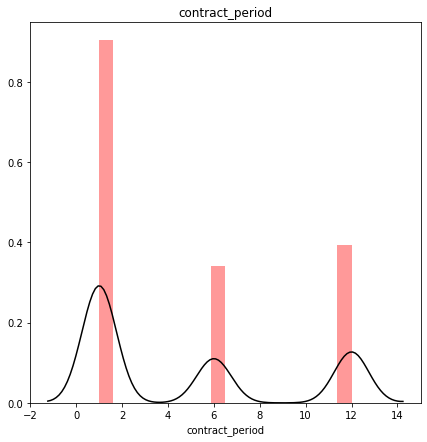

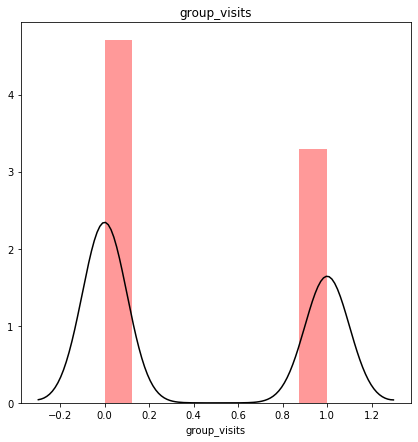

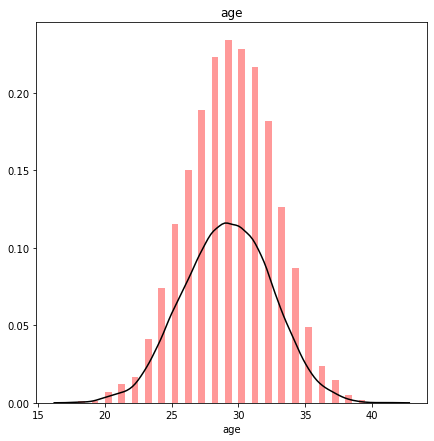

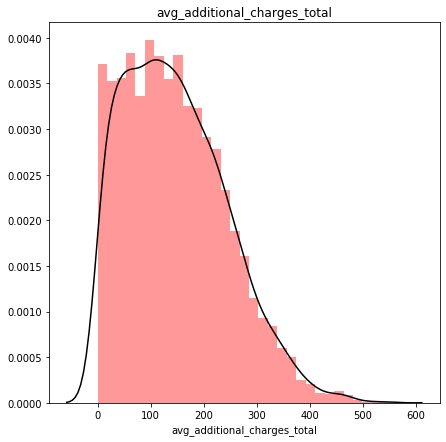

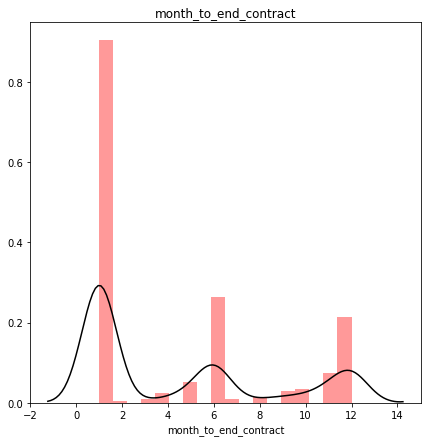

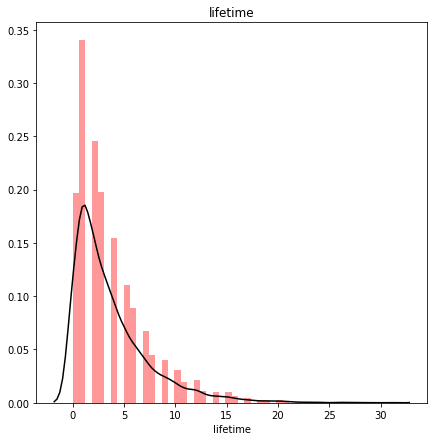

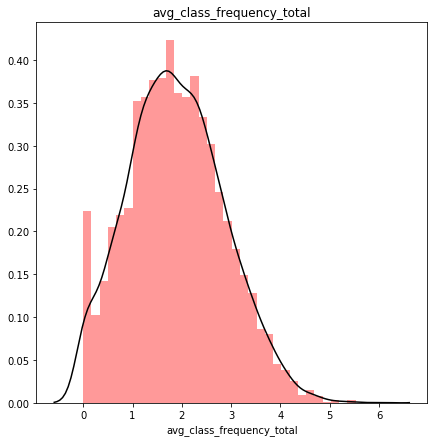

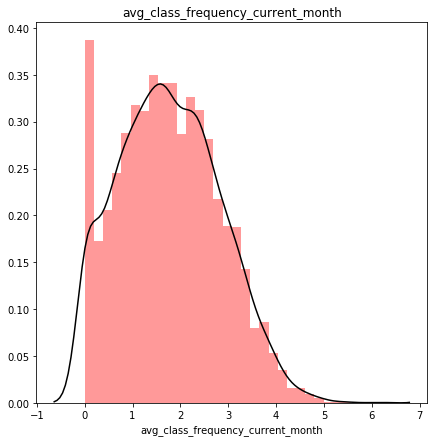

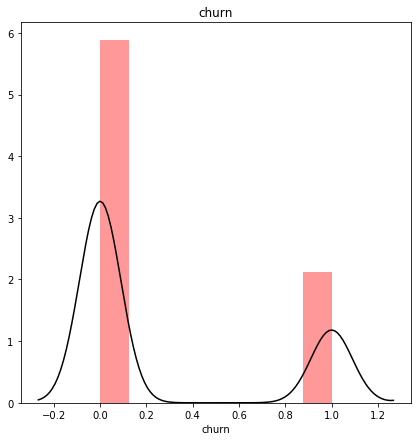

In [7]:
for column in df.columns:
   
    plt.figure(figsize=(7, 7))
    df.groupby('churn')[column]
    sns.distplot(df[column], color = 'r', kde_kws={"color": 'k'})
    plt.title(column)
    plt.show()
    

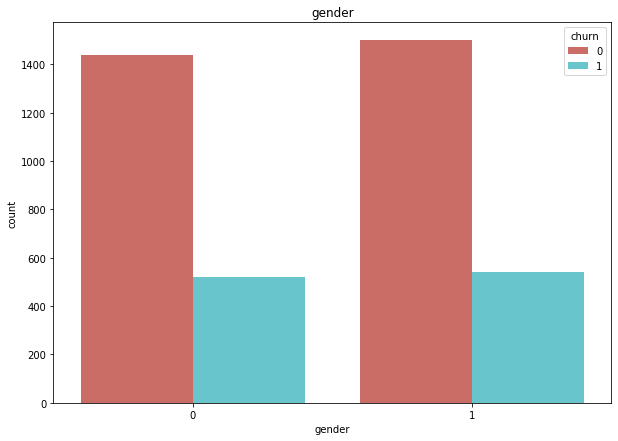

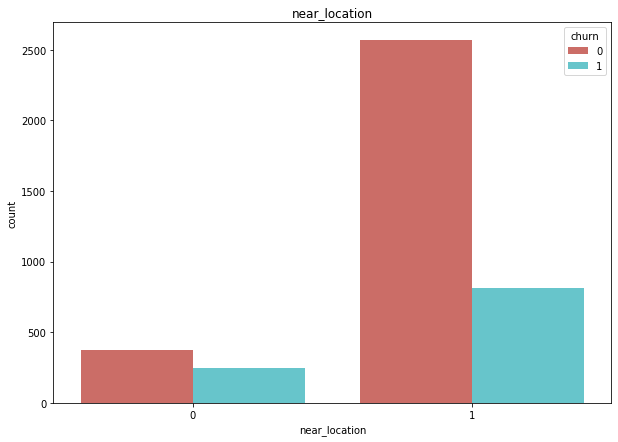

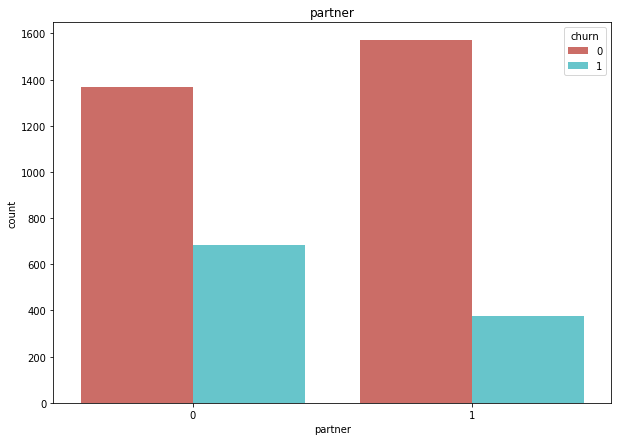

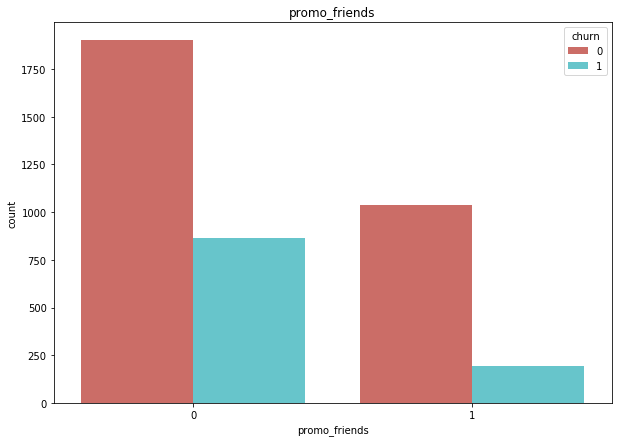

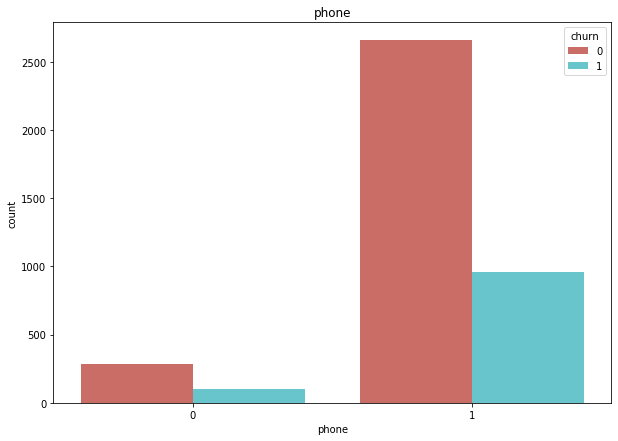

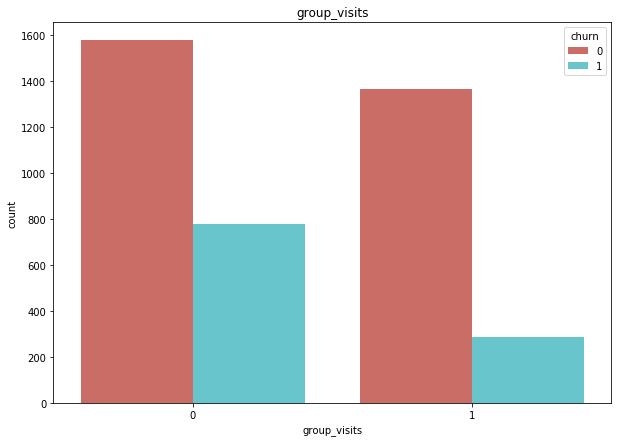

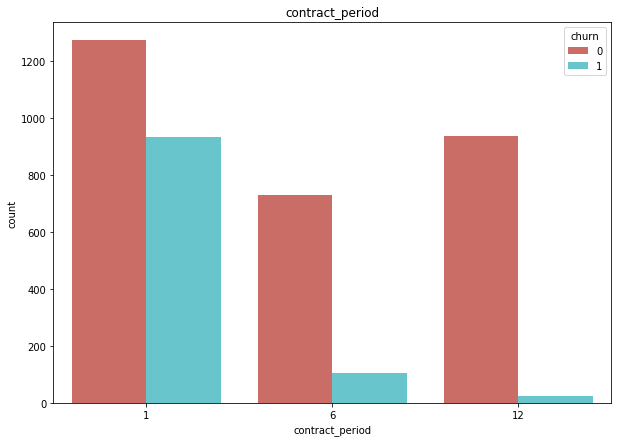

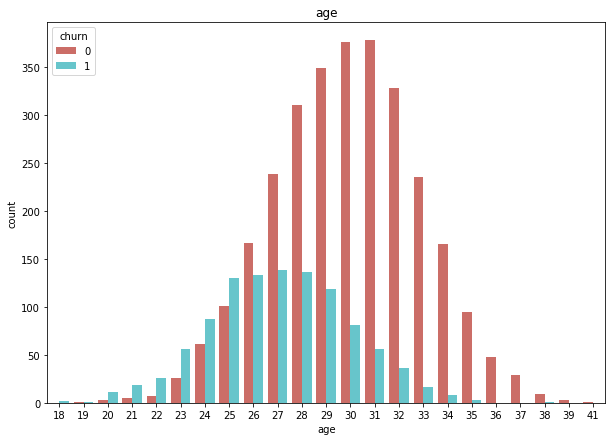

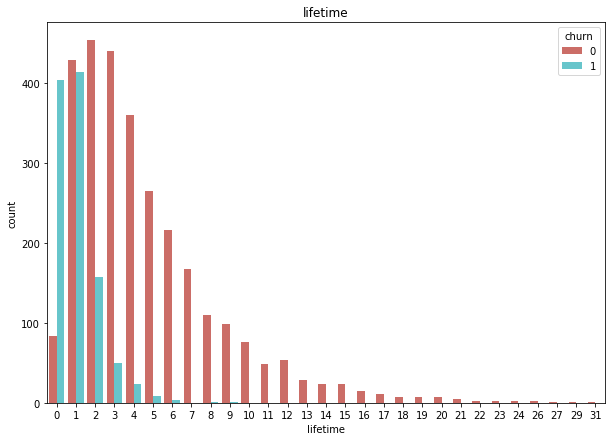

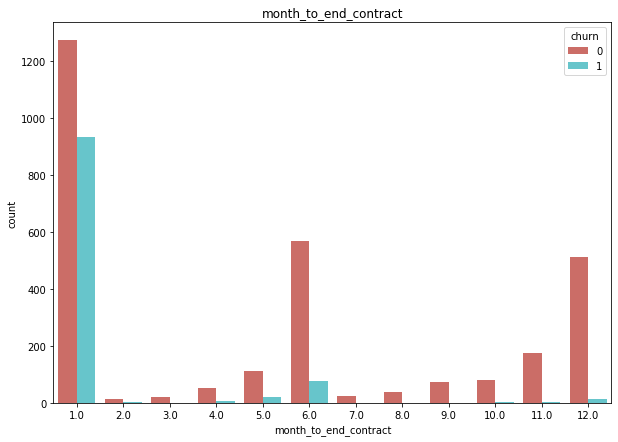

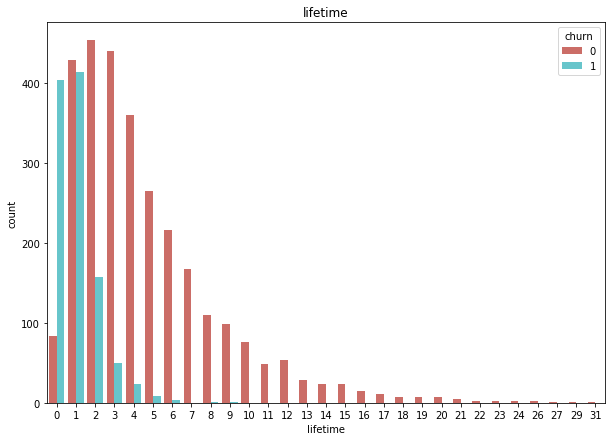

In [8]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'contract_period', 'age', 
               'lifetime', 'month_to_end_contract', 'lifetime' ]:

    plt.figure(figsize=(10, 7))
    sns.countplot(x = df[column], hue='churn', data=df, palette = 'hls')
    plt.title(column)
    plt.show()

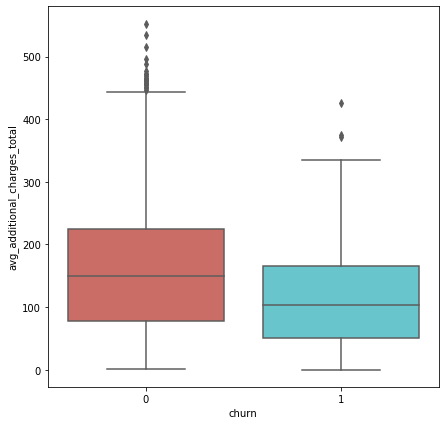

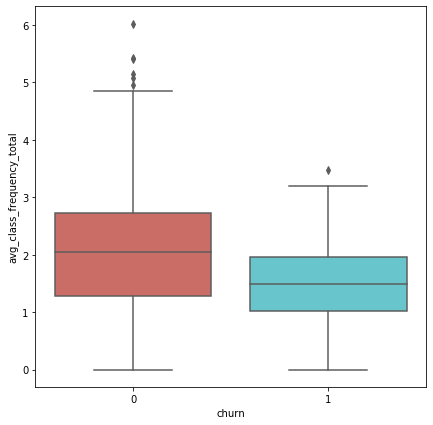

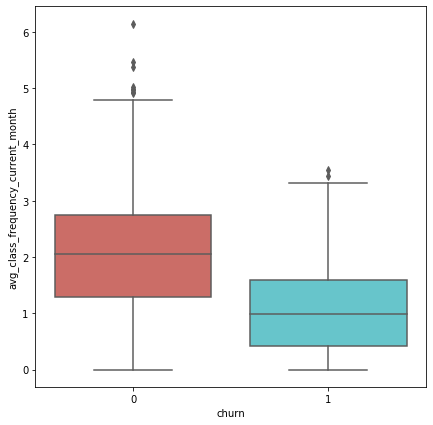

In [9]:
# Добавим боксплоты для средних значений, столбчатая диаграмма выглядит неинформативно для столбцов ниже
for column in [ 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x='churn', y = df[column], data = df, palette = 'hls')
    plt.show()

**2.4 Постройте матрицу корреляций и отобразите её**

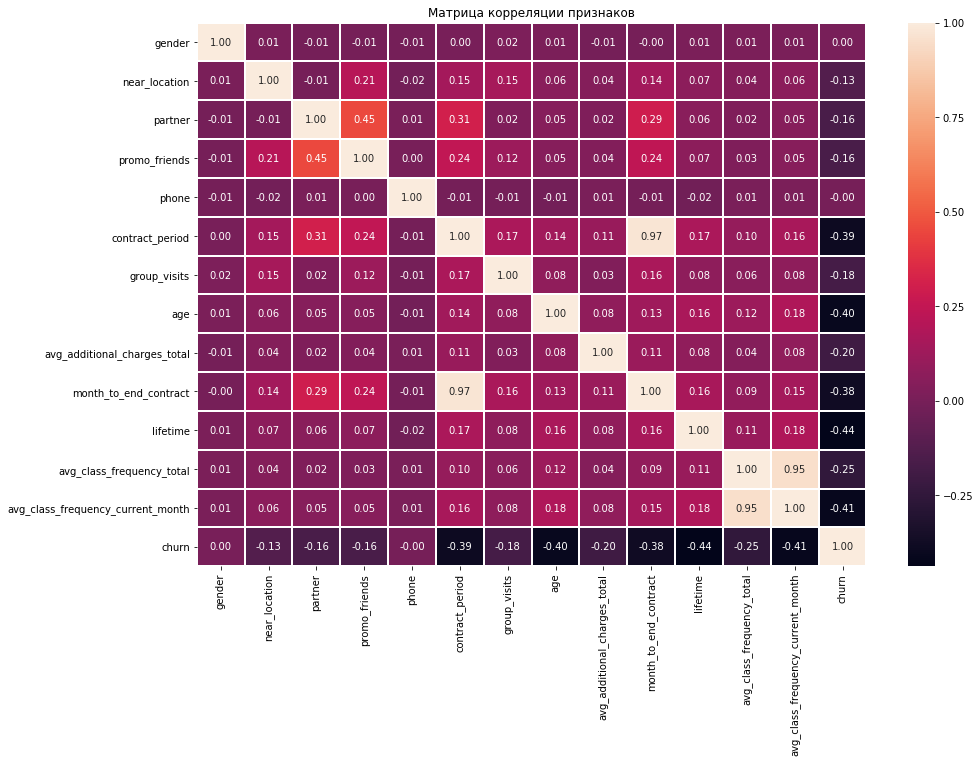

In [10]:
#Отрисуем матрицу корреляции
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', linewidths=1)
plt.title('Матрица корреляции признаков')
plt.show()


**Вывод по 2.4**: C целевой переменной никак не коррелируют пол и наличие телефона. Больше всего обратно коррелируют возраст, длинна договора, среднее количество посещений в месяц и остаток времени до конца договора.

**Шаг 3. Постройте модель прогнозирования оттока клиентов**

**3.1 Разбейте данные на обучающую и валидационную выборку функцией train_test_split()**

In [11]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

In [12]:
#разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**3.2 Обучите модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом.**

**3.2.1 Логистическая регрессия**

In [13]:
#задаем алгоритм
model = LogisticRegression()

In [14]:
# обучаем модель
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#оценим результат
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


**3.2.2 Случайный лес**

In [16]:
#Поэкспериментируем с числом деревьев с целью поиска лучшей модели
rf_list = [50, 75, 100, 250, 500, 1000]

In [17]:
for i in rf_list:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_st = scaler.transform(X_train)
    X_test_st = scaler.transform(X_test)
    
    rf_model = RandomForestClassifier(n_estimators = i, random_state = 0)
    
    rf_model.fit(X_train_st, y_train)
    
    rf_predictions = rf_model.predict(X_test_st) 
    rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
    
    print('Число деревьев =', i)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
    print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
    print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
    print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
    print('----------------------------')

Число деревьев = 50
Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84
----------------------------
Число деревьев = 75
Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83
----------------------------
Число деревьев = 100
Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83
----------------------------
Число деревьев = 250
Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83
----------------------------
Число деревьев = 500
Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83
----------------------------
Число деревьев = 1000
Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83
----------------------------


**3.3 Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?**

Логистическая регрессия выглядит чуть лучше. Мне не удалось подобрать параметры случайного леса таким образом, чтобы лучшим оказался этот вариант

**Шаг 4. Сделайте кластеризацию клиентов**

**4.1 Стандартизируйте данные**

In [18]:
df_с = df.drop(['churn'], axis=1)
df_columns_list = df_с.columns
df_с = StandardScaler().fit_transform(df_с)
df_с = pd.DataFrame(df_с, columns = df_columns_list).astype('float64')

**4.2 Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.**

In [19]:
linked = linkage(df_с, method = 'ward')

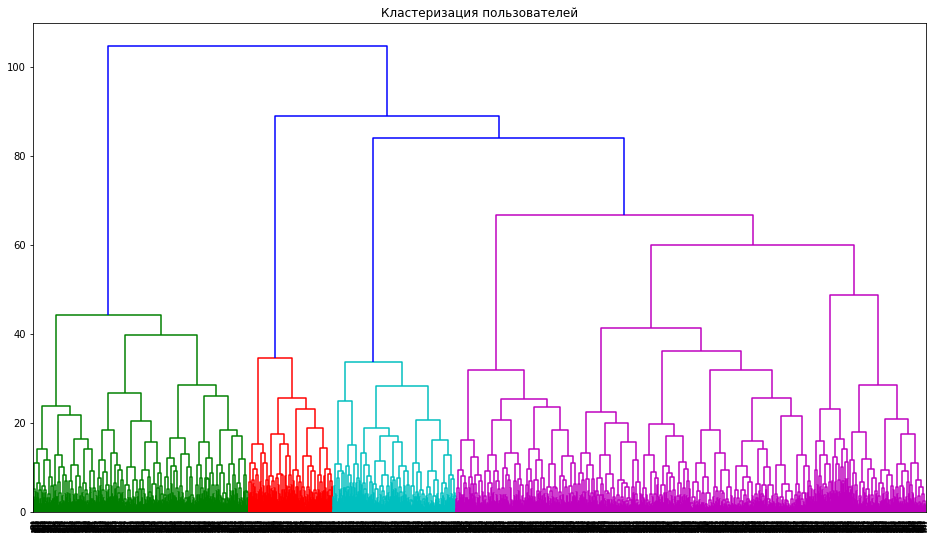

In [20]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Сделаем вывод, что число кластеров = 5

**4.3 Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).**

In [21]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(df_с)
df['cluster'] = labels

In [22]:
df['cluster'].value_counts()

1    1238
4    1021
2     848
3     507
0     386
Name: cluster, dtype: int64

In [23]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.523316,0.483845,0.564858,0.497041,0.498531
near_location,0.862694,1.000000,0.977594,0.000000,0.960823
partner,0.471503,0.355412,0.343160,0.461538,0.783546
promo_friends,0.305699,0.242326,0.221698,0.078895,0.575906
phone,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4.777202,1.962843,2.550708,2.378698,10.854065
group_visits,0.427461,0.340065,0.472877,0.218935,0.539667
age,29.297927,28.144588,30.122642,28.479290,29.972576
avg_additional_charges_total,144.208179,130.918569,161.268043,135.631940,161.128963
month_to_end_contract,4.466321,1.872375,2.349057,2.224852,9.920666


**4.4 Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?**

 - Кластеры неравнозначны по количеству клиентов и доле оттока. 
 
Есть пара хороших кластеров (1 и 4):
 
 
 - низкий % оттока
 - 2 кластер выделяется длительностью абонемента
 - оба кластера выделяются временем с момента первого обращения — ходят давно
 - большими расходами на доп. услуги
 - средняя частота посещений выше, чем у остальных кластеров

**4.5 Постройте распределения признаков для кластеров.**

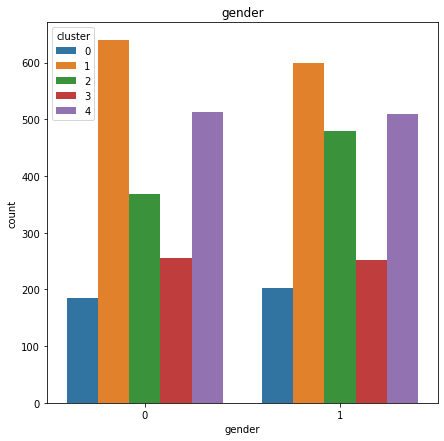

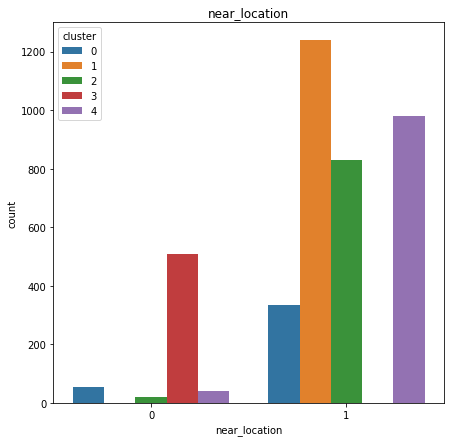

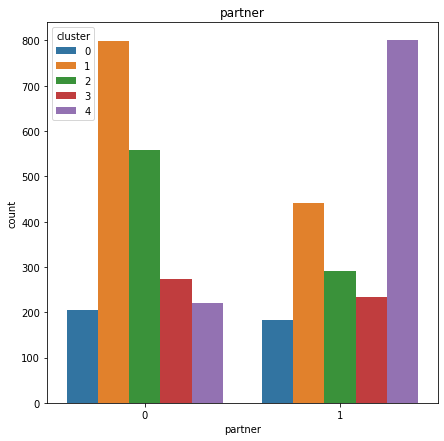

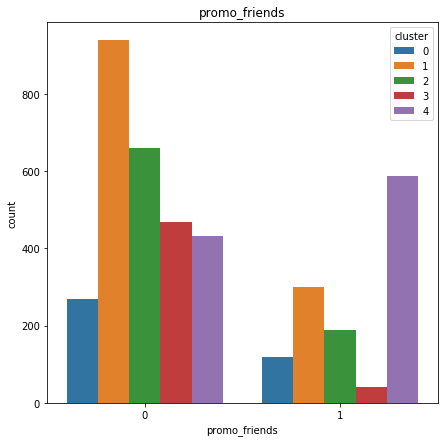

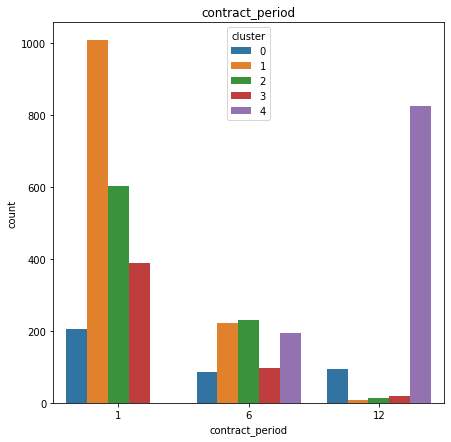

In [24]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(7, 7))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

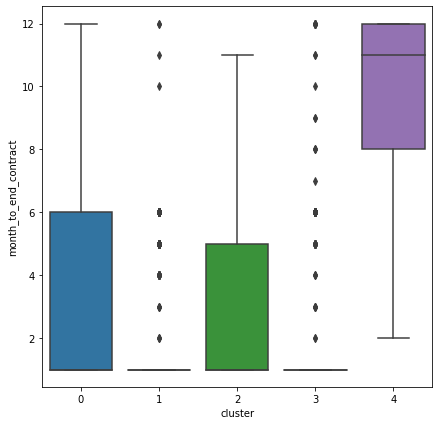

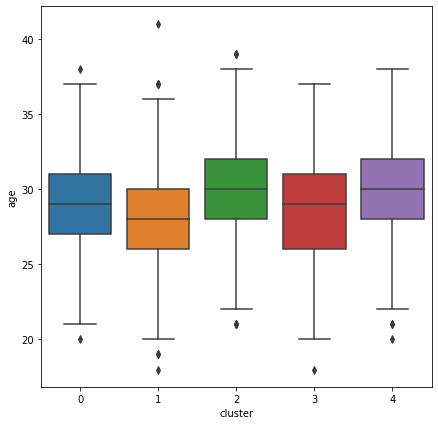

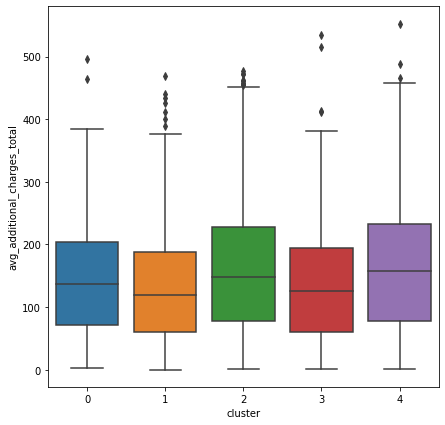

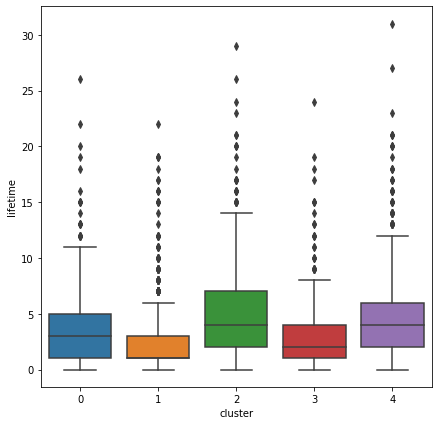

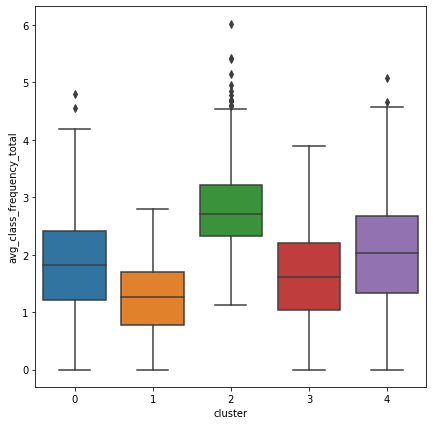

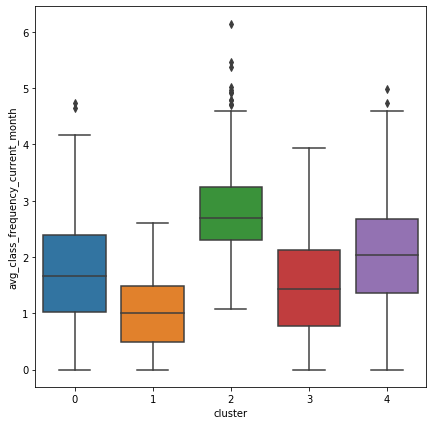

In [25]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(7, 7))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

**Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами**

 - Необходимо лучше сегментировать оттекающих и продумать предложения для уменьшения количества уходящих клиентов
 - Продумать акции и скидки для кластеров 1 и 4
 - Постараться уменьшить процент оттока заранее. Видоизменить аналитику в компании
 - Разработать рекламную компанию для клиентов, которые подходят под характеристики 1 и 4 кластеров